In [38]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import time
import re

In [39]:
plt.style.use('ggplot')

In [40]:
movies = pd.read_csv('data/movies.csv')
movies.shape

(9742, 3)

In [41]:
movies.head()

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [42]:
movies['year'] = movies.title.str.extract("\((\d{4})\)", expand=True)
movies.year = pd.to_datetime(movies.year, format='%Y')
movies.year = movies.year.dt.year # As there are some NaN years, resulting type will be float (decimals)

In [46]:
movies.head()

,movieId,title,genres,year
0,1,Toy Story (1995),"[Adventure, Animation, Children, Comedy, Fantasy]",1995.0
1,2,Jumanji (1995),"[Adventure, Children, Fantasy]",1995.0
2,3,Grumpier Old Men (1995),"[Comedy, Romance]",1995.0
3,4,Waiting to Exhale (1995),"[Comedy, Drama, Romance]",1995.0
4,5,Father of the Bride Part II (1995),[Comedy],1995.0


In [48]:
movies.head()

,movieId,title,genres,year
0,1,Toy Story (1995),"[Adventure, Animation, Children, Comedy, Fantasy]",1995.0
1,2,Jumanji (1995),"[Adventure, Children, Fantasy]",1995.0
2,3,Grumpier Old Men (1995),"[Comedy, Romance]",1995.0
3,4,Waiting to Exhale (1995),"[Comedy, Drama, Romance]",1995.0
4,5,Father of the Bride Part II (1995),[Comedy],1995.0


In [49]:
all_genres = set([y for x in range(len(movies.genres.tolist())) for y in movies.genres.tolist()[x]])

In [50]:
all_genres = list(all_genres)
all_genres

['Sci-Fi',
 'Musical',
 'IMAX',
 'Western',
 'Animation',
 'Adventure',
 'Film-Noir',
 'Mystery',
 'Romance',
 'Comedy',
 'Action',
 'War',
 'Fantasy',
 'no_genre',
 'Drama',
 'Crime',
 'Documentary',
 'Horror',
 'Children',
 'Thriller']

In [51]:
ratings = pd.read_csv('data/ratings.csv')
ratings.shape

(100836, 4)

In [52]:
ratings.head()

,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931


In [55]:
# Removing timestamp
ratings.drop(columns='timestamp').head()

,userId,movieId,rating
0,1,1,4.0
1,1,3,4.0
2,1,6,4.0
3,1,47,5.0
4,1,50,5.0


## Genre based calculations

In [56]:
# Avg. rating per genre

In [57]:
# create a dictionary of empty lists for all the genres
genre_selection = {key: [] for key in all_genres}
genre_selection

{'Sci-Fi': [],
 'Musical': [],
 'IMAX': [],
 'Western': [],
 'Animation': [],
 'Adventure': [],
 'Film-Noir': [],
 'Mystery': [],
 'Romance': [],
 'Comedy': [],
 'Action': [],
 'War': [],
 'Fantasy': [],
 'no_genre': [],
 'Drama': [],
 'Crime': [],
 'Documentary': [],
 'Horror': [],
 'Children': [],
 'Thriller': []}

In [58]:
for i in range(movies.shape[0]):
    for genre in movies.loc[i, 'genres']:
        genre_selection[genre].append(movies.loc[i, 'movieId'])

In [59]:
np.count_nonzero(genre_selection['Drama'])

4361

In [60]:
genre_counts = {all_genres[i]: np.count_nonzero(genre_selection[all_genres[i]]) for i in range(len(all_genres))}

In [61]:
genre_counts

{'Sci-Fi': 980,
 'Musical': 334,
 'IMAX': 158,
 'Western': 167,
 'Animation': 611,
 'Adventure': 1263,
 'Film-Noir': 87,
 'Mystery': 573,
 'Romance': 1596,
 'Comedy': 3756,
 'Action': 1828,
 'War': 382,
 'Fantasy': 779,
 'no_genre': 34,
 'Drama': 4361,
 'Crime': 1199,
 'Documentary': 440,
 'Horror': 978,
 'Children': 664,
 'Thriller': 1894}

In [62]:
genre_list_counts = [(all_genres[i], np.count_nonzero(genre_selection[all_genres[i]])) for i in range(len(all_genres))]


In [63]:
genre_list_counts.sort(key=lambda x: int(x[1]), reverse=True)
genre_list_counts

[('Drama', 4361),
 ('Comedy', 3756),
 ('Thriller', 1894),
 ('Action', 1828),
 ('Romance', 1596),
 ('Adventure', 1263),
 ('Crime', 1199),
 ('Sci-Fi', 980),
 ('Horror', 978),
 ('Fantasy', 779),
 ('Children', 664),
 ('Animation', 611),
 ('Mystery', 573),
 ('Documentary', 440),
 ('War', 382),
 ('Musical', 334),
 ('Western', 167),
 ('IMAX', 158),
 ('Film-Noir', 87),
 ('no_genre', 34)]

In [64]:
genre_names = [i[0] for i in genre_list_counts]
genre_counts = [i[1] for i in genre_list_counts]

In [65]:
min(movies.year)

1902.0

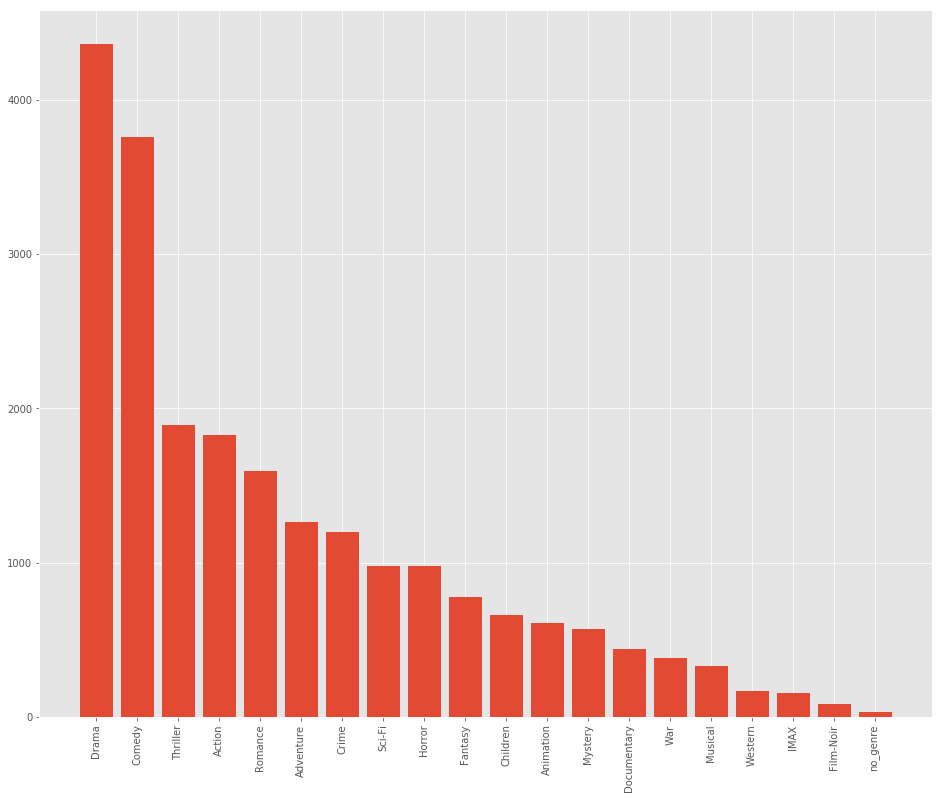

In [66]:
fig, ax = plt.subplots(figsize=(16, 13))
plt.xticks(rotation='vertical')
#pal = sns.color_palette("Greens_d", len(groupedvalues))
#r
ax.bar(genre_names, genre_counts)
fig.savefig('Number of movies per genre')

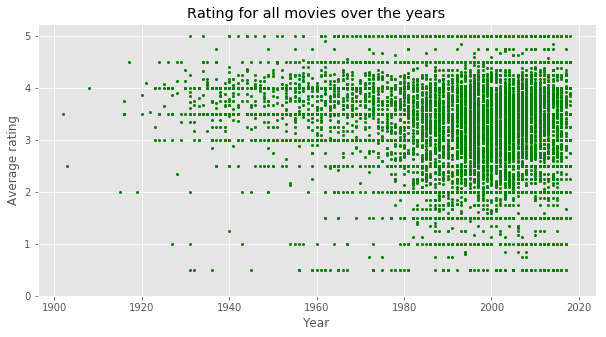

In [67]:
movies_rating = movies[['movieId', 'year']].set_index('movieId').join(ratings[['movieId', 'rating']].groupby('movieId').mean())
fig, ax = plt.subplots(figsize=(10,5))
plt.plot(movies_rating.year, movies_rating.rating,"g.", markersize=4)
plt.xlabel('Year')
plt.ylabel('Average rating')
plt.title('Rating for all movies over the years')
plt.ylim(0,)
plt.show()
fig.savefig('Rating for movies over the years')


In [68]:
movies.head()

,movieId,title,genres,year
0,1,Toy Story (1995),"[Adventure, Animation, Children, Comedy, Fantasy]",1995.0
1,2,Jumanji (1995),"[Adventure, Children, Fantasy]",1995.0
2,3,Grumpier Old Men (1995),"[Comedy, Romance]",1995.0
3,4,Waiting to Exhale (1995),"[Comedy, Drama, Romance]",1995.0
4,5,Father of the Bride Part II (1995),[Comedy],1995.0


In [74]:
values=[]
for i in range(len(all_genres)):
    values.append([])
genres_classify=dict(zip(all_genres, values))
 
for i in range(movies.shape[0]):
     for genre in movies.loc[i,'genres']:
         genres_classify[genre].append(movies.loc[i,'movieId'])

In [75]:
data=[]
for g in all_genres:
    #sub is all ratings for the movies in the genres g.
    sub=np.array(ratings[ratings['movieId'].isin(genres_classify[g])].rating)
    data.append(sub)

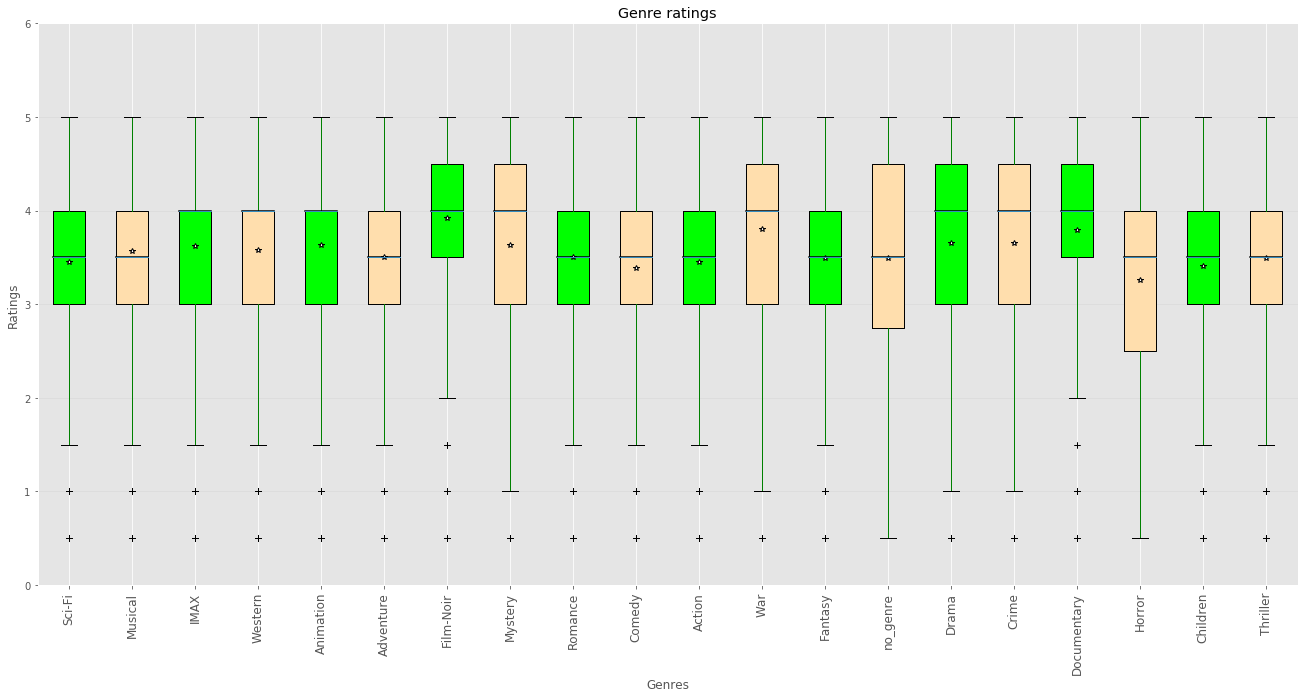

In [82]:
from matplotlib.patches import Polygon

fig, ax1 = plt.subplots(figsize=(20, 12))
fig.canvas.set_window_title('Genre ratings')
plt.subplots_adjust(left=0.075, right=0.95, top=0.9, bottom=0.25)
 
bp = plt.boxplot(data, notch=0, sym='+', vert=1, whis=1.5)
plt.setp(bp['boxes'], color='black')

 

ax1.yaxis.grid(True, linestyle='-', which='major', color='lightgrey',
 alpha=0.5)
 
ax1.set_axisbelow(True)
ax1.set_title('Genre ratings')
ax1.set_xlabel('Genres')
ax1.set_ylabel('Ratings')
 
boxColors = ['lime', 'navajowhite']
plt.setp(bp['whiskers'], color='green')
numBoxes=20
 
medians = list(range(numBoxes))
for i in range(numBoxes):
    box = bp['boxes'][i]
    boxX = []
    boxY = []
    for j in range(5):
        boxX.append(box.get_xdata()[j])
        boxY.append(box.get_ydata()[j])
        boxCoords = list(zip(boxX, boxY))
    k = i % 2
    boxPolygon = Polygon(boxCoords, facecolor=boxColors[k])
    ax1.add_patch(boxPolygon)
    med = bp['medians'][i]
    medianX = []
    medianY = []
    for j in range(2):
        medianX.append(med.get_xdata()[j])
        medianY.append(med.get_ydata()[j])
    plt.plot(medianX, medianY, 'k')
    medians[i] = medianY[0]
    plt.plot([np.average(med.get_xdata())], [np.average(data[i])],
    color='w', marker='*', markeredgecolor='k')
 
ax1.set_xlim(0.5, numBoxes + 0.5)
top = 6
bottom = 0
ax1.set_ylim(bottom, top)
xtickNames = plt.setp(ax1, xticklabels=all_genres)
plt.setp(xtickNames, rotation=90, fontsize=12)
plt.savefig('genre ratings.png')

## User related movies and ratings

In [157]:
tempDf = ratings[ratings['userId'] == 75]
tempDf = tempDf.sort_values(by=['rating'], ascending = False)[0:10]
tempDf

,userId,movieId,rating,timestamp
12247,75,4993,5.0,2006
12234,75,2078,5.0,2006
12199,75,260,5.0,2006
12244,75,3681,5.0,2006
12218,75,1214,4.5,2006
12210,75,928,4.5,2006
12214,75,1198,4.5,2006
12219,75,1234,4.5,2006
12206,75,908,4.5,2006
12203,75,589,4.5,2006


In [128]:
movies_user = list(tempDf['movieId'])
movies_user

[4993, 2078, 260, 3681, 1214, 928, 1198, 1234, 908, 589]

In [155]:
titles_seen = []
for monieId in movies_user:
    titles_seen.append((movies.loc[movies['movieId'] == monieId]['title']))

In [156]:
titles_seen[]

[3638    Lord of the Rings: The Fellowship of the Ring,...
 Name: title, dtype: object, 1543    Jungle Book, The (1967)
 Name: title, dtype: object, 224    Star Wars: Episode IV - A New Hope (1977)
 Name: title, dtype: object, 2743    For a Few Dollars More (Per qualche dollaro in...
 Name: title, dtype: object, 915    Alien (1979)
 Name: title, dtype: object, 709    Rebecca (1940)
 Name: title, dtype: object, 900    Raiders of the Lost Ark (Indiana Jones and the...
 Name: title, dtype: object, 934    Sting, The (1973)
 Name: title, dtype: object, 690    North by Northwest (1959)
 Name: title, dtype: object, 507    Terminator 2: Judgment Day (1991)
 Name: title, dtype: object]